# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
!pip install -U scikit-learn


In [2]:
# Import numpy and pandas
# Import numpy and pandas
import warnings
import itertools 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

import seaborn as sns 
import pylab as plt

#from fbprophet import Prophet

from sklearn.metrics import mean_squared_error as mse

plt.style.use('fivethirtyeight')

warnings.filterwarnings('ignore')


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [3]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [4]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
# Your code here:
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [6]:
# Your code here:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [7]:
# Your code here:, 
indice = pd.date_range(start='01/01/2018 00:00:00', 
                        end='01/01/2018 00:29:10', 
                        periods=1751)




Assign the time series index to the dataframe's index.

In [8]:
# Your code here:
indice_ser = pd.Series(indice, name='fecha')
df_indice = pd.concat([sensor, indice_ser], axis=1)
df_indice.set_index('fecha', inplace=True, drop=True)
df_indice.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
fecha,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

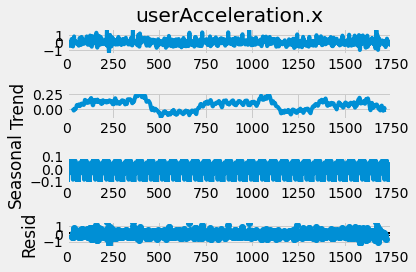

In [9]:
# Your code here:
import statsmodels.api as sm

userAcceleration = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq=60)
userAccelerationplot = userAcceleration.plot()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

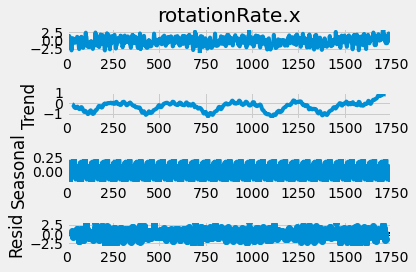

In [10]:
rotationRate = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq=60)
rotationRateplot = rotationRate.plot()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

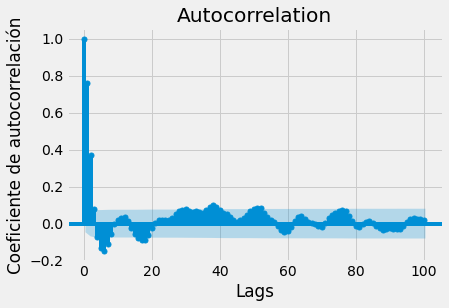

In [11]:
# Your code here:
tsaplots.plot_acf(df_indice['userAcceleration.x'].values.squeeze(), lags=100)
plt.xlabel('Lags')
plt.ylabel('Coeficiente de autocorrelación')
plt.show()


Create a lag plot for `rotationRate.x`

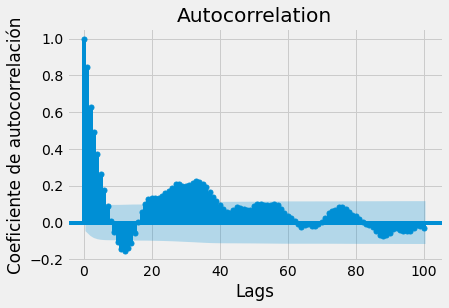

In [12]:
# Your code here:

tsaplots.plot_acf(df_indice['rotationRate.x'].values.squeeze(), lags=100)
plt.xlabel('Lags')
plt.ylabel('Coeficiente de autocorrelación')
plt.show()


What are your conclusions from both visualizations?

In [13]:
# Your conclusions here:



The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [14]:
# Your code here:

def viewing_stationarity(df, window=5):
 # """Esta función genera un plot para una serie de tiempo
#con su media móvil y su desviación estándar.
  #"""

    rolmean = df.rolling(window=window).mean()
    rolstd = df.rolling(window=window).std()

    fig = plt.figure(figsize=(10, 5))
    time_series = plt.plot(df, color='blue', label='original')
    mean = plt.plot(rolmean, color='red', label='media móvil')
    std = plt.plot(rolstd, color='green', label='desviación estándar móvil')
    plt.legend(loc='best')
    plt.show();

In [15]:
class Stationary:
    def __init__(self, significance=0.05):
        self.significance_level = significance
        self.pvalue = None
        self.is_stationary = None
    
    def ADF(self, values):
        result = adfuller(values, autolag='AIC')

        format_results = pd.Series(result[:4], 
                                    index=['Statistic', 'P-value',
                                          'Num of Lags', 'Observations'])
        for k,v in result[4].items():
            format_results[f'Critical Value {k}'] = v
            return format_results

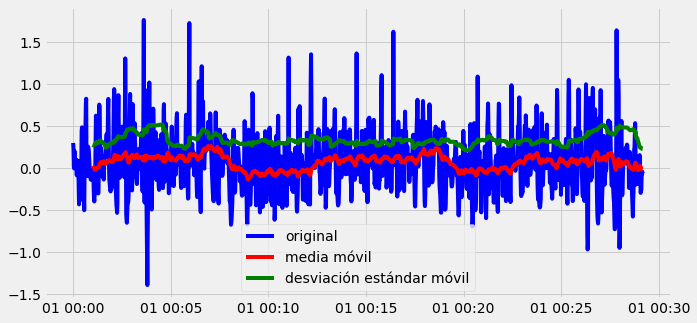

In [16]:
df_aceleracion = df_indice['userAcceleration.x']
viewing_stationarity(df_aceleracion, window=60)


In [17]:
adf_test = Stationary()
adf_test.ADF(df_aceleracion.values).round(5)

Statistic             -17.95799
P-value                 0.00000
Num of Lags             4.00000
Observations         1746.00000
Critical Value 1%      -3.43410
dtype: float64

What are your conclusions from this test?

In [18]:
# Your conclusions here:



Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [19]:
# Your code here:
model_df_aceleracion = SARIMAX(df_aceleracion, 
                    order=(2,1,0), 
                    enforce_stationarity=False)

results = model_df_aceleracion.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     userAcceleration.x   No. Observations:                 1751
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 206.858
Date:                Fri, 04 Mar 2022   AIC                           -407.716
Time:                        19:40:37   BIC                           -391.317
Sample:                    01-01-2018   HQIC                          -401.654
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4039      0.014     28.559      0.000       0.376       0.432
ar.L2         -0.3207      0.017    -18.725      0.000      -0.354      -0.287
sigma2         0.0462      0.001     51.669      0.000       0.044       0.048
===================================================================================
Ljung-Box (L1) (Q):                   3.81   Jarque-Bera (JB):              2758.35
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.30
Prob(H) (two-sided):                  0.57   Kurtosis:                         9.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [20]:
ultimos = df_aceleracion.tail(10)